In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score 

In [5]:
# Load the dataset
df = pd.read_csv('life_expectancy_cleaned.csv')

# Selecting Features (X) and Target (y)
X = df[['Year', 'InfantMortality']]
y = df['LifeExpectancy']

In [6]:
# Split: 80% Training, 20% Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Training set size: 1763
Testing set size: 441


In [7]:
# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Output coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")

Intercept: -469.4885198734722
Coefficients: [ 0.26772058 -4.55966156]


In [8]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Evaluation Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (Accuracy): {r2:.2f}")

Root Mean Squared Error (RMSE): 7.15
R-squared (Accuracy): 0.34


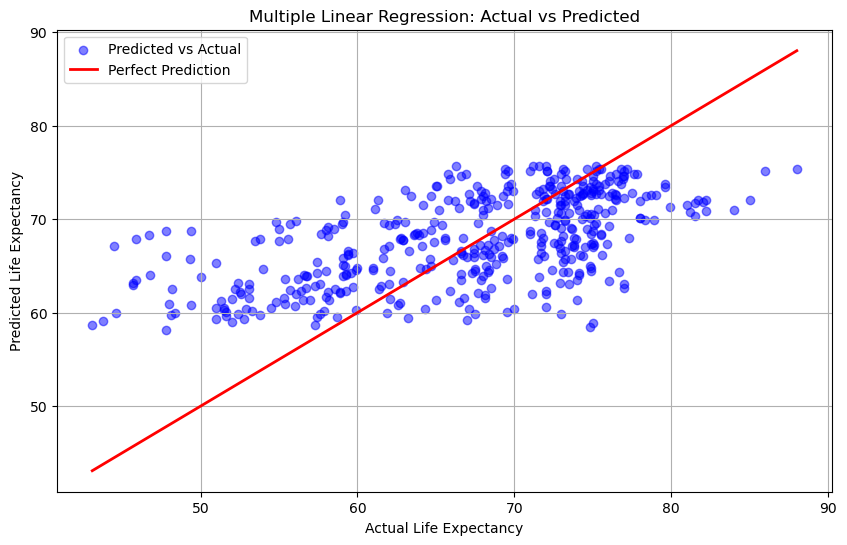

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Multiple Linear Regression: Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.show()